## Morfología matemática

La morfología matemática es una teoría y conjunto de técnicas para el análisis y tratamiento de las estructuras geométricas mediante operaciones morfológicas.

Las operaciones morfológicas simplifican las imágenes y conservan las principales características de forma de los objetos. También se utilizan para tareas de pre y post procesamiento como puede ser el filtrado, el adelgazamiento y engrosamiento de los elementos de una imagen.

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
generation = "MOD4GEN13"

In [ ]:
root_path = f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/img/"

### Erosión

La erosión es una de las dos operaciones fundamentales (la otra es la dilatación) en el procesamiento de imágenes morfológico en las que se basan todas las otras operaciones morfológicas. Fue definida originalmente para imágenes binarias, más tarde se extendió a imágenes en escala de grises.

La operación de erosión utiliza un elemento estructurante para palpar y **reducir las formas contenidas en la imagen de entrada**.

(300, 300)


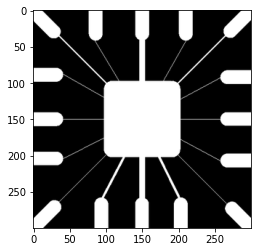

In [ ]:
img = cv2.imread(os.path.join(root_path, "wiring.png"), cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap="gray");

In [ ]:
img[:100, :100]

array([[255, 255, 255, ...,   5,   0,   0],
       [255, 255, 255, ...,   5,   0,   0],
       [255, 255, 255, ...,   5,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 224,  39],
       [196, 196, 196, ..., 109, 255, 227],
       [  0,   0,   0, ...,   0, 109, 255]], dtype=uint8)

#### Elemento estructurante

La idea básica en la morfología binaria es probar una imagen con una forma predefinida simple sacando conclusiones sobre cómo esta forma encaja o no las formas en la imagen. Esta simple "sonda" se llama elemento estructurante, y es en sí misma una imagen binaria.

In [ ]:
# k = 11,15,45 - Se puede probar con diferentes tamaños del elemento estructurante

k = 11
structuring_element = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2
m, n = img.shape

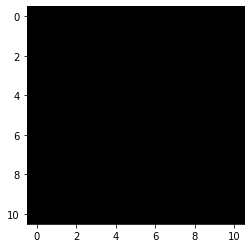

In [ ]:
plt.imshow(structuring_element, cmap="gray");

In [ ]:
img_erode = np.zeros((m,n), dtype=np.uint8)

In [ ]:
img_erode.shape

(300, 300)

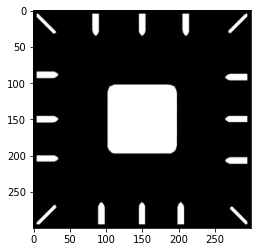

In [ ]:
# Erosión artesanal
for i in range(constant, m-constant):
    for j in range(constant, n-constant):
        temp = img[i-constant:i+constant+1, j-constant:j+constant+1]
        product = temp*structuring_element
        img_erode[i,j] = np.min(product)

plt.imshow(img_erode, cmap="gray");

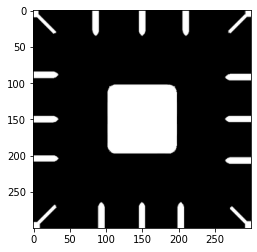

In [ ]:
# Erosión utilizando la función incorporada en cv2 para obtener el elemento estructurante y realizar la operación
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (k,k))
img_erode = cv2.erode(src=img, kernel=structuring_element, iterations=1)
plt.imshow(img_erode, cmap="gray");

### Dilatación

La operación de dilatación también utiliza un elemento estructurante para sondear y **expandir las formas contenidas en la imagen de entrada.**

(262, 300)


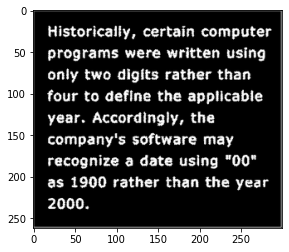

In [ ]:
img = cv2.imread(os.path.join(root_path, "text.png"), cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap="gray");

In [ ]:
p, q = img.shape
img_dilate= np.zeros((p, q), dtype=np.uint8)

In [ ]:
# Se define el elemento estructurante
structuring_element = np.array([[0,1,0], [1,1,1], [0,1,0]])
constant = 1

In [ ]:
structuring_element

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

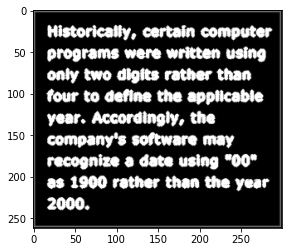

In [ ]:
# Dilatación artesanal
for i in range(constant, p-constant):
    for j in range(constant, q-constant):
        temp= img[i-constant:i+constant+1, j-constant:j+constant+1]
        product= temp*structuring_element
        img_dilate[i,j]= np.max(product)

plt.imshow(img_dilate, cmap="gray");

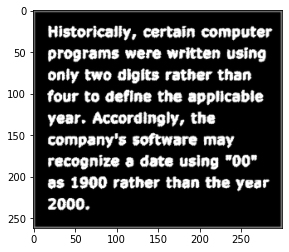

In [ ]:
# Dilatación utilizando la función incorporada en cv2 para obtener el elemento estructurante y realizar la operación
structuring_element = cv2.getStructuringElement(cv2.MORPH_DILATE, (2,2))
img_dilate = cv2.dilate(src=img, kernel=structuring_element, iterations=1)
plt.imshow(img_dilate, cmap="gray");

### Apertura y Cierre

En morfología matemática, la apertura es la dilatación de la erosión de un conjunto A por un elemento estructurante B, por otro lado, el cierre es la erosión de la dilatación de un conjunto A por un elemento estructurante B.

En el procesamiento de imágenes, el cierre es, junto con la apertura, el caballo de batalla básico de la eliminación de ruido morfológico. Al aperturar se eliminan los objetos pequeños, mientras que al cerrar se eliminan los agujeros pequeños. Son operaciones de filtrado morfológico.


In [ ]:
def erosion(img, structuring_element):
  img_erode = cv2.erode(img, structuring_element, iterations=1)
  return img_erode

In [ ]:
def dilation(img, structuring_element):
  img_dilate = cv2.dilate(img, structuring_element, iterations=1)
  return img_dilate

(226, 300)


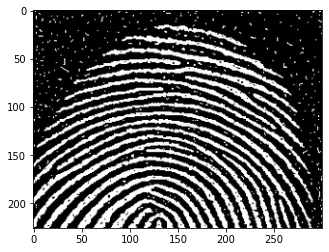

In [ ]:
img = cv2.imread(os.path.join(root_path, "fingerprint.png"), cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap="gray");

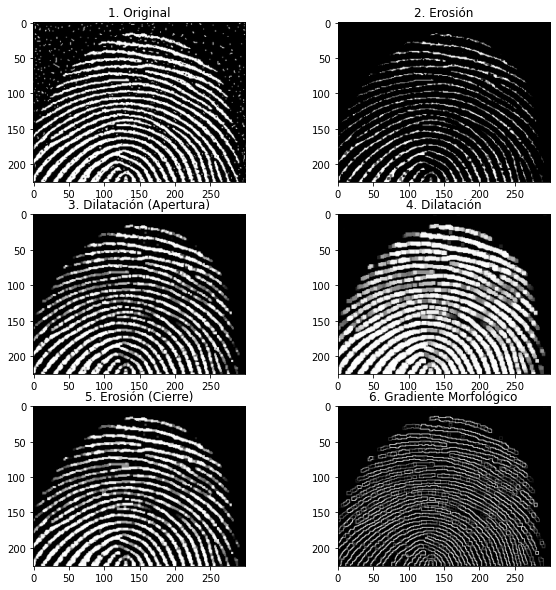

In [ ]:
# Elemento estructurante
B = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Erosion
AeB= erosion(img, B)

# Erosión -> Dilatación (Apertura)
AoB= dilation(AeB, B)

# Dilatación
AoBdB= dilation(AoB, B)

# Dilatación -> Erosión (Cierre)
AoBdBeB= erosion(AoBdB, B)

# Visualización
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img, cmap="gray")
plt.title("1. Original")
plt.subplot(3,2,2)
plt.title("2. Erosión")
plt.imshow(AeB, cmap="gray")
plt.subplot(3,2,3)
plt.title("3. Dilatación (Apertura)")
plt.imshow(AoB, cmap="gray")
plt.subplot(3,2,4)
plt.title("4. Dilatación")
plt.imshow(AoBdB, cmap="gray")
plt.subplot(3,2,5)
plt.title("5. Erosión (Cierre)")
plt.imshow(AoBdBeB, cmap="gray")
plt.subplot(3,2,6)
plt.title("6. Gradiente Morfológico")
plt.imshow(AoBdB-AoBdBeB, cmap="gray");

Estas técnicas también se pueden utilizar para encontrar formas específicas en una imagen. Se define el gradiente morfológico como la diferencia entre la dilatación y la erosión de una imagen dada y puede ser utilizado para encontrar elementos específicos como bordes o esquinas. O la operación top-hat como la diferencia entre la imagen original y la operación de apertura para aplicar corrección de sombreado.